<a href="https://colab.research.google.com/github/Foxess/Neural-Nets/blob/main/Regression_in_neuralnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#importing libraries
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [23]:
# x_train = features, y_train = target
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [24]:
#Scaling the data
def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [31]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [32]:

#learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [33]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(loss=msle,  optimizer=Adam(learning_rate=0.01), metrics=[msle])
# train the model
history = model.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=20,
    #callbacks=[early_stopping],
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
213/213 [==============================] - 4s 12ms/step - loss: 5.2332 - mean_squared_logarithmic_error: 5.2214 - val_loss: 0.6504 - val_mean_squared_logarithmic_error: 0.6470
Epoch 2/20
213/213 [==============================] - 1s 7ms/step - loss: 0.2498 - mean_squared_logarithmic_error: 0.2495 - val_loss: 0.3803 - val_mean_squared_logarithmic_error: 0.3848
Epoch 3/20
213/213 [==============================] - 1s 6ms/step - loss: 0.1887 - mean_squared_logarithmic_error: 0.1887 - val_loss: 0.2722 - val_mean_squared_logarithmic_error: 0.2795
Epoch 4/20
213/213 [==============================] - 1s 6ms/step - loss: 0.1507 - mean_squared_logarithmic_error: 0.1506 - val_loss: 0.2028 - val_mean_squared_logarithmic_error: 0.2102
Epoch 5/20
213/213 [==============================] - 1s 6ms/step - loss: 0.1250 - mean_squared_logarithmic_error: 0.1249 - val_loss: 0.1604 - val_mean_squared_logarithmic_error: 0.1677
Epoch 6/20
213/213 [==============================] - 1s 6ms/step - l

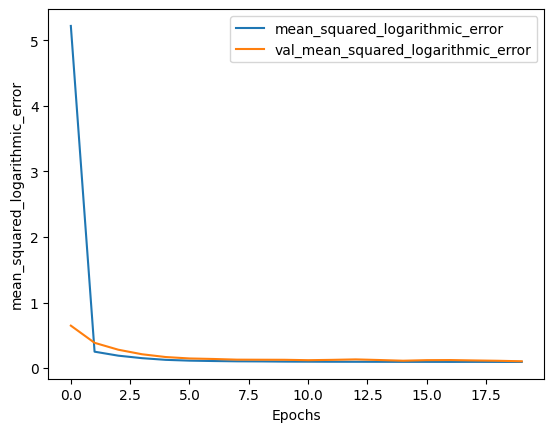

In [34]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')